# Telco Churn Project

## Objectives:
- Predict what variables are driving customers to churn using the classification methodologies learned.
- Aquire, prepare, explore, test, model and make visualizations of what are the main drivers of churn.
- Present to the codeup panel of my finding in a jupyter notebook.

## Goals:
- The goal of this project is try and predict what variables are driving customers to churn using classification methods recently learned. I will be analyzing the telco data set in codeups sql server.
- Create an aquire.py and prepare.py files to aid in analyzing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from acquire import get_telco_data
from prepare import prepare_telco
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating DF 
df = get_telco_data()
# Splitting data into train validate and split
train, validate, test = prepare_telco(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head()

train -> (3943, 23)
validate -> (1691, 23)
test -> (1409, 23)


,customer_id,male,senior_citizen,partners,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,payment_type,tenure_years
4604,1004-NOZNR,1,1,0,1,56,1,0,2,1,...,1,1,2,0,4,94.80,5264.30,0,Credit card (automatic),4.67
5566,1051-GEJLJ,0,0,0,0,2,1,0,3,0,...,0,0,1,0,2,19.50,27.55,0,Mailed check,0.17
6204,4632-PAOYU,1,0,1,1,22,1,0,3,0,...,0,0,2,0,2,19.95,433.50,0,Mailed check,1.83
5837,5868-YTYKS,1,0,0,1,1,1,0,3,0,...,0,0,1,1,2,20.25,20.25,0,Mailed check,0.08
1276,0895-LMRSF,1,0,0,0,23,1,0,1,0,...,1,1,2,1,3,64.90,1509.80,0,Bank transfer (automatic),1.92


Text(0.5, 1.0, 'What is the Monthly Tenure of Customers?')

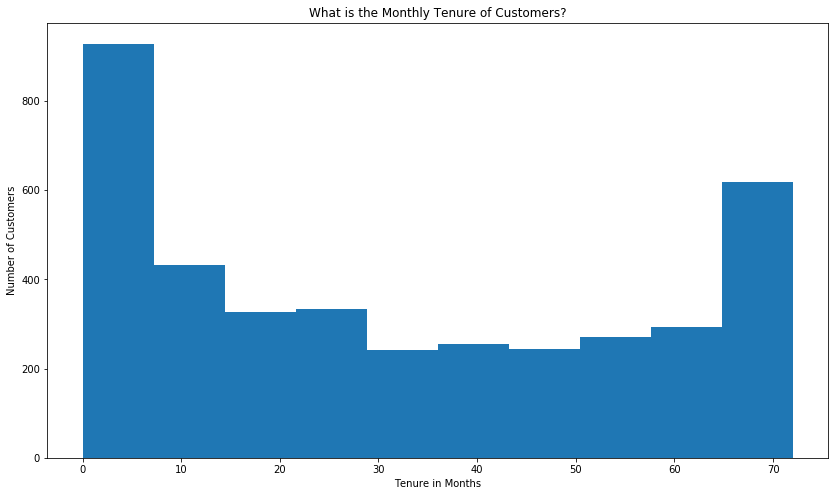

In [3]:
# Monthly charges distribution
plt.figure(figsize=(14,8))
plt.hist(train.tenure)
plt.xlabel('Tenure in Months')
plt.ylabel('Number of Customers')
plt.title('What is the Monthly Tenure of Customers?')

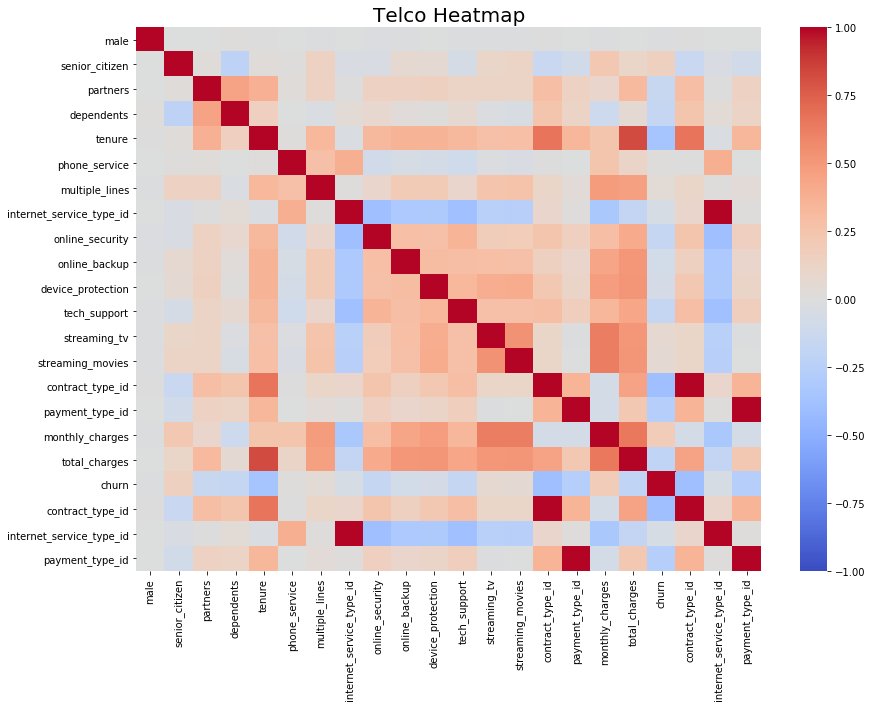

In [4]:
# Heat map showing how the variables correlate to each other
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),
            vmin = -1, 
            cmap='coolwarm',
           annot=False).set_title("Telco Heatmap", fontsize=20);

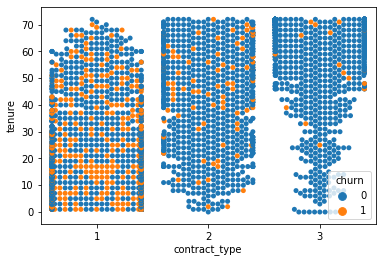

In [62]:
# Swarmplot of the different contracts and tenure with churn as the hue
p = sns.swarmplot(x="contract_type", y="tenure", hue="churn", data=train,)

# What features influence churn?

## Does phone_service influence churn?

Ho: null hypothesis: Having online backup does not affect churn.

Ha: alt hypothesis: Having online backup affects customers from churning.

In [63]:
# Comparing two categorical features. Using the chi squared test
# Setting the alpha
alpha = .05

# Performing crosstab
observed = pd.crosstab(train.churn, train.online_backup)
observed

online_backup,0,1
churn,,
0,1824,1072
1,770,277


In [65]:
# Performing test
chi2, p, degf, expected = chi2_contingency(observed)
print(f"The p value is {round(p,2)} which is less than alpha. We reject the null hypothesis.")
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

The p value is 0.0 which is less than alpha. We reject the null hypothesis.
Observed

[[1824 1072]
 [ 770  277]]
---
Expected

[[1905.20517373  990.79482627]
 [ 688.79482627  358.20517373]]
---

chi^2 = 37.6319
p     = 0.0000


## Does tech support mean customers have longer tenures?

Ho: null hypothesis: Having tech support does not increase the tenure.
        
Ha: alt hypothesis: Having tech support increases the tenure of customers.

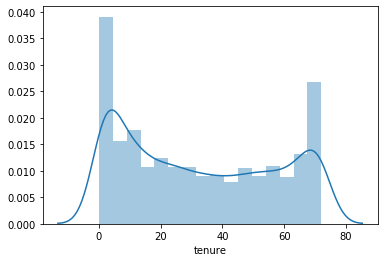

In [9]:
# Distribution plot of tenure
sns.distplot(df.tenure)

In [10]:
# Comparing categorical and continuous variables. Using a one sample, one tailed T-test. Since null hypothesis
# states tech support increases tenure, evaluate p/2 <.05 and t > 0.
alpha = .05

t, p = stats.ttest_ind(train.tech_support, train.tenure)
print(t, p/2)
print(f"We reject the null hypothesis as p = {p/2} which is less than alpha of .05")

-80.55788927183167 0.0
We reject the null hypothesis as p = 0.0 which is less than alpha of .05


## Creating a baseline prediction

In [11]:
# Looking at the makeup of customers who don't churn and do churn
train.churn.value_counts()

0    2896
1    1047
Name: churn, dtype: int64

In [12]:
# Created a baseline prediction for churn
train['baseline_prediction'] = 'not churn'
train.head().T


,4604,5566,6204,5837,1276
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF
male,1,0,1,1,1
senior_citizen,1,0,0,0,0
partners,0,0,1,0,0
dependents,1,0,1,1,0
tenure,56,2,22,1,23
phone_service,1,1,1,1,1
multiple_lines,0,0,0,0,0
internet_service_type,2,3,3,3,1
online_security,1,0,0,0,0


In [13]:
# Quick crosstab detailing the baseline of churn
pd.crosstab(train.baseline_prediction, train.churn)

churn,0,1
baseline_prediction,,
not churn,2896,1047


In [14]:
# Shows us 73% of customers did not churn
baseline_accuracy = 1- (train.churn).mean()
baseline_accuracy

0.7344661425310677

# Performing Logistic Regression on mostly all the variables

In [15]:
# Performing a 
X_train = train.drop(columns = ["churn", "baseline_prediction", "customer_id", "payment_type","tenure"])
y_train = train.churn

In [16]:
logit1 = LogisticRegression()

In [17]:
# Fit the training data set
logit1 = logit1.fit(X_train, y_train)
X_train.T

,4604,5566,6204,5837,1276,3042,5110,2090,5217,624,...,4713,1547,4012,3482,4541,1794,817,901,1987,6958
male,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.0
senior_citizen,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0
partners,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.0
dependents,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0
phone_service,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.0
multiple_lines,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.0
internet_service_type,2.00,3.00,3.00,3.00,1.00,2.00,2.00,1.00,2.00,1.00,...,2.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,3.0
online_security,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,...,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.0
online_backup,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.0
device_protection,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [18]:
# My coefficents and y-intercept
print(logit1.coef_)
print(logit1.intercept_)

[[-3.24315884e-02  2.27082832e-01  6.36717668e-02 -2.29640378e-01
  -5.26724104e-01  1.46145863e-01 -9.23690182e-02 -4.80454614e-01
  -3.30560276e-01 -5.98793485e-02 -4.83312014e-01  8.80501858e-02
   2.33966221e-02 -7.12491594e-01  5.11851115e-01 -1.41689044e-01
   2.47290360e-02  1.86211675e-04 -5.45613959e-01]]
[-0.02791688]


In [19]:
y_pred = logit1.predict(X_train)

In [20]:
#Accuracy of model
logit1.score(X_train, y_train)

0.7998985544002029

In [21]:
coef_df = pd.DataFrame(logit1.coef_)
coef_df.T

,0
0,-0.032432
1,0.227083
2,0.063672
3,-0.229640
4,-0.526724
5,0.146146
6,-0.092369
7,-0.480455
8,-0.330560
9,-0.059879


## 2nd Logistic Regression

In [22]:
# Selected varibales based on coefficents above
X_train2= train[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_train = train.churn

In [23]:
logit2 = LogisticRegression()

In [24]:
# Fit the data
logit2 = logit2.fit(X_train2, y_train)

In [25]:
print(logit2.coef_)
print(logit2.intercept_)

[[-0.17393889 -1.3071696  -0.22990195  0.07796036  0.12243373]]
[1.15102003]


In [26]:
y_pred = logit2.predict(X_train2)

In [27]:
# Second models accuracy
logit2.score(X_train2, y_train)

0.7316763885366472

## Validating the Logistic Regression

In [28]:
# Validating the model
X_validate= validate[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_validate = validate.churn

In [29]:
# Validation accuracy
logit2.score(X_validate, y_validate)

0.745712596096984

# Decision Tree

In [30]:
# Setting max depth
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [31]:
# Training data
X_train = train[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_train = train.churn

In [32]:
# Fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [33]:
y_pred = clf.predict(X_train)

In [34]:
y_pred_proba = clf.predict_proba(X_train)

In [35]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.76


## Validating on the Decesion Tree

In [36]:
#clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [37]:
X_validate= validate[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_validate = validate.churn

In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


# KNN

In [83]:
# Set neighbors to 5
knn = KNeighborsClassifier(n_neighbors=5)

In [80]:
# Training the data
X_train = train[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_train = train.churn

In [81]:
# Fitting the data
knn = knn.fit(X_train, y_train)

In [82]:
# Accuracy
knn.score(X_train, y_train)

0.7567841744864316

In [43]:
y_pred_knn = knn.predict(X_train)

In [44]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2896
           1       0.54      0.54      0.54      1047

    accuracy                           0.76      3943
   macro avg       0.69      0.69      0.69      3943
weighted avg       0.76      0.76      0.76      3943



In [45]:
print(confusion_matrix(y_train, y_pred_knn))

[[2424  472]
 [ 483  564]]


In [46]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_knn).ravel()
tn, fp, fn, tp

(2424, 472, 483, 564)

In [47]:
accuracy = round((tp + tn)/ (tp + tn + fp + fn),2)
precision = round(tp/(tp + fp),2)
recall = round(tp/(tp + fn),2)

In [48]:
print(f"Train model \nAccuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

Train model 
Accuracy: 0.76, Precision: 0.54, Recall: 0.54


If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts?

Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)

## Validate on KNN

In [49]:
#knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
# Validating 
X_validate= validate[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_validate = validate.churn

In [51]:
# Accuracy of t
knn.score(X_validate, y_validate)

0.7362507392075694

In [52]:
y_pred_knn = knn.predict(X_validate)

In [53]:
print(classification_report(y_validate, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1253
           1       0.49      0.52      0.51       438

    accuracy                           0.74      1691
   macro avg       0.66      0.67      0.66      1691
weighted avg       0.74      0.74      0.74      1691



In [54]:
print(confusion_matrix(y_validate, y_pred_knn))

[[1016  237]
 [ 209  229]]


In [55]:
tn, fp, fn, tp = confusion_matrix(y_validate, y_pred_knn).ravel()
tn, fp, fn, tp

(1016, 237, 209, 229)

In [56]:
accuracy = round((tp + tn)/ (tp + tn + fp + fn),2)
precision = round(tp/(tp + fp),2)
recall = round(tp/(tp + fn),2)

In [57]:
print(f"Train model \nAccuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

Train model 
Accuracy: 0.74, Precision: 0.49, Recall: 0.52


## Test on Decision Tree

In [58]:
#clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [59]:
X_test= test[["tenure_years", "contract_type","tech_support", "online_backup", "phone_service"]]
y_test = test.churn

In [60]:
y_pred = clf.predict(X_test)

In [61]:
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on the test set: 0.75


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1025
           1       0.65      0.18      0.29       384

    accuracy                           0.75      1409
   macro avg       0.71      0.57      0.57      1409
weighted avg       0.73      0.75      0.70      1409

